In [68]:
from pymystem3 import Mystem
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import razdel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import os
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [ ]:
# with open("story_time_top1900") as file:
#     text = file.read()
#     print(text)

In [63]:
mystem = Mystem()
def lemmatize_with_mystem(text):
    words = [lemma for lemma in mystem.lemmatize(text) if not lemma.isspace() and not lemma.isnumeric() 
            and lemma.isalpha()]
#     analysis = text.analysis(text)
#     for w in words:
#         if w == "снимать":
#             print(w)
    return words

In [3]:
lemmatize_with_mystem('че как сниму')

['че', 'как', 'снимать']

In [11]:
def read_texts(file_names_in_classes, path_to_file = ""):
    labels = []
    data = []
    for class_index, per_classes in enumerate(file_names_in_classes):
        for file_name in per_classes:
            with open(f"{path_to_file}{file_name}") as file:  
                text = file.read() 
                asjson = json.loads(text)
                if 'response' not in asjson:
                    continue
                items = asjson['response']['items']
                for i in items:
                    post = i['text']
                    if len(post.strip()) == 0:
                        continue
#                     if not "сним" in post.lower() or class_index == 0:
                    data.append(post)
                    labels.append(class_index)
#                     else:
#                         print(post)
#                         data.append(post)
#                         labels.append(0)
    return data, labels

In [12]:
def get_files_with_prefixes(prefixes):
    files = os.listdir()
    res = []
    for f in files:
        found_p = False
        for p in prefixes:
            if f.startswith(p):
                res.append(f)
                break
        if found_p:
            continue
    return res

In [13]:
pos = get_files_with_prefixes(["spb_zhilie_top_", "baza102"])

In [14]:
neg = get_files_with_prefixes(["kv2_project_haus_top", "kv_draft_top", "story_time_top"])

In [15]:
len(neg), len(pos)

(39, 45)

In [16]:
corpus, labels = read_texts([neg, pos])

In [17]:
np.array(labels).shape

(8327,)

In [70]:
%%time
idf_vectorizer = TfidfVectorizer(tokenizer=lemmatize_with_mystem)
idf_vectorizer.fit(corpus)

CPU times: user 4.61 s, sys: 369 ms, total: 4.98 s
Wall time: 21.7 s


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function lemmatize_with_mystem at 0x7f4590514c80>,
                use_idf=True, vocabulary=None)

In [72]:
pickle.dump(idf_vectorizer, open("idf_vectorizer.pickle", "wb"))

In [71]:
idf_vectorizer.get_feature_names()

['a',
 'adwords',
 'agender',
 'air',
 'airpods',
 'aiza',
 'albert',
 'album',
 'aleksandra',
 'alekseev',
 'alexander',
 'alisochka',
 'andre',
 'andrey',
 'androgyne',
 'androgynous',
 'android',
 'angelina',
 'annaslunkova',
 'app',
 'apple',
 'aricidia',
 'art',
 'associated',
 'aster',
 'asterisk',
 'attention',
 'avito',
 'azizyan',
 'b',
 'baby',
 'bagel',
 'bar',
 'baranova',
 'barsukova',
 'baдимм',
 'baшe',
 'bce',
 'bceм',
 'bcя',
 'be',
 'before',
 'beko',
 'bigender',
 'billion',
 'binary',
 'bogdan',
 'bolto',
 'bong',
 'borisov',
 'bosch',
 'boт',
 'breitbart',
 'bright',
 'by',
 'bднх',
 'bзял',
 'bидeo',
 'bлoжили',
 'bсем',
 'bы',
 'bыcoтa',
 'c',
 'candy',
 'careprost',
 'cc',
 'charities',
 'chezhile',
 'chill',
 'china',
 'chrome',
 'cis',
 'cisgender',
 'citizengo',
 'clck',
 'collie',
 'columbus',
 'com',
 'cosmopolitan',
 'couple',
 'coutinho',
 'cшα',
 'd',
 'davidson',
 'dee',
 'desagregation',
 'desire',
 'dim',
 'dimidasuka',
 'discount',
 'disney',
 'djeks

In [73]:
X = idf_vectorizer.transform(corpus).toarray()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=2)

In [75]:
X_train.shape

(6661, 21024)

In [76]:
y_train

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,


In [77]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/home/lenant/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
pickle.dump(model, open("logistic_regression.pickle", 'wb'))

In [78]:
predictions = model.predict(X_test)

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       786
           1       1.00      0.99      1.00       880

    accuracy                           1.00      1666
   macro avg       1.00      1.00      1.00      1666
weighted avg       1.00      1.00      1.00      1666



In [80]:
mystem.lemmatize("студия квартира сниму")

['студия', ' ', 'квартира', ' ', 'снимать', '\n']

In [81]:
test_phrase = idf_vectorizer.transform([", 12 тыс, звоните она девушка и квартира "])
model.predict_proba(test_phrase)

array([[0.36709742, 0.63290258]])

In [29]:
model.predict(test_phrase)

array([1])

In [36]:
catmodel = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    iterations=100,
    logging_level='Silent'
)

In [37]:
catmodel.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True,
    
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [38]:
cat_predictions = catmodel.predict(X_test)
print(classification_report(y_test, cat_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       786
           1       1.00      0.98      0.99       880

    accuracy                           0.99      1666
   macro avg       0.99      0.99      0.99      1666
weighted avg       0.99      0.99      0.99      1666



In [39]:
test_phrase = idf_vectorizer.transform(["Сдам квартиру"])
print(catmodel.predict_proba(test_phrase))
print(model.predict_proba(test_phrase))

[[0.14518057 0.85481943]]
[[0.04213918 0.95786082]]


In [30]:
user_files = list(filter(lambda x: not x.startswith("imgs"), os.listdir("users")))

In [31]:
user_files

['296223202',
 '21396646',
 '182542581',
 '69268578',
 '135371914',
 '42925635',
 '50489710',
 '16830545',
 '300142517',
 '67776051',
 '45381423',
 '133991588',
 '16767884',
 '34759633',
 '155299417',
 '252888333',
 '283665818',
 '145345246',
 '347149421',
 '162997415',
 '340786579',
 '80520900',
 '64076248',
 '331926894',
 '200210927',
 '83118205',
 '30857751',
 '190004459',
 '193989043',
 '136057466',
 '147993097',
 '31971947',
 '182409893',
 '107674924',
 '27419',
 '53686117',
 '5814891',
 '14832986',
 '172628804',
 '4206431',
 '239464756',
 '531765280',
 '49403731',
 '180058457',
 '300634639',
 '132586190',
 '153822475',
 '221480667',
 '10387980',
 '30677464',
 '18040853',
 '160647076',
 '33689293',
 '186556087',
 '123118168',
 '257617715',
 '216759789',
 '63804712',
 '182032859',
 '80977240',
 '34021053',
 '177927682',
 '306713291',
 '77742482',
 '120056886',
 '517236',
 '188163112',
 '216916273',
 '189776486',
 '135707237',
 '5495660',
 '153200756',
 '157363847',
 '139132165',
 '

In [32]:
users_lemmed = read_texts([user_files], "users/")

In [33]:
users_lemmed[0]

['Коротко о первом курсе',
 'Уже знаешь, кем станешь в будущем?',
 'Если бы iBek писал на с++ вместо питона',
 'Ахаха хаха...\n\nмда',
 'Моя первая лекция для bonch.dev о такой непростой вещи, как дизайн интерфейса. Работаем дальше! 💪',
 'Приходите или смотрите трансляции в группе. Уверенна, будет интересно :3',
 'Тут круто :3',
 'Поехали!',
 'Рванули в Токсово 🚆',
 '💪',
 'Просто лучшие 💜\n#ИСиТ_МОЩЬ',
 'Вау, а что это? \nНовый выпуск Nostalgic Streamer! 🙌',
 'Башни, замки, церкви и монастыри.🔆 Наша первая самостоятельная поездка в @ Таллин, Эстония 🚈',
 'Подписывайтесь на канал, ставьте лайки, жмите на колокольчик :3',
 'Девять причин почему я не люблю ветер:',
 'Смотрю в светлое будущее в #ночьмузеевспб 🌛',
 '🌸',
 '31.03.2017, А2 Green Concert\nТак жарко в Питере еще не было 🔥',
 'Великолепный концерт! Спасибо #PMJ за незабываемый вечер ❤',
 'Время кавая 💖🇯🇵',
 'Скучающий пёс \nPart_2',
 'Сестренка нарисовала скучающего песика, и он оказался чертовски обаятельным) Не удержалась и пон

In [34]:
X_users = idf_vectorizer.transform(users_lemmed[0]).toarray()

In [35]:
X_users.shape

(10617, 21024)

In [40]:
linear_preds = model.predict(X_users)
cat_preds = catmodel.predict(X_users)

In [41]:
np.where(linear_preds==1)[0]

array([  840,   842,   874,  1093,  1274,  1343,  3291,  3347,  3516,
        3904,  3916,  4378,  4664,  4882,  5074,  5617,  5679,  5876,
        6165,  6468,  6731,  6800,  6933,  7339,  7366,  7644,  7825,
        8105,  8337,  8437,  8897,  9119,  9523,  9981, 10020])

In [42]:
np.where(cat_preds==1)[0]

array([  190,   318,   388,   451,   844,   874,   939,  1274,  1529,
        1571,  1654,  1768,  2208,  2248,  2286,  2410,  2422,  2438,
        2968,  3198,  3212,  3317,  3329,  3345,  3347,  3572,  3916,
        3951,  4101,  4426,  4464,  4477,  4668,  5876,  6077,  6234,
        6889,  7227,  7340,  7445,  7463,  7644,  7825,  8240,  8246,
        8539,  8897,  8937,  9152,  9204,  9833,  9839,  9850,  9851,
        9853,  9981,  9983, 10272, 10354, 10447, 10459])

In [43]:
for i in np.where(linear_preds==1)[0]:
    print(users_lemmed[0][i])
    print("---")

Язь на НТВ (с)
---
В комнате ямайка
---
друг сдает комнату
---
350 метров. Радиомачта А320 в Галиче.
---
Платному интернету в метро быть?)
(Купил за 50 рублей на месяц попробовать)
---
Фото с основателем systemd, pulseaudio и т.д. (Леннарт Поттеринг)
DevConf.Cz, Brno, Czech
---
С 8 по 16 октября в Праге ❤️кого поснимать?)

Md [id140514823|Alexia Iordanova]
---
Снимаю на коммерческих условиях, Москва-Питер 🔥💫

Md [id140514823|Alexia Iordanova]
---
буду в СПб с 31 мая по 5 июня. 
Хотите встретиться — пишите в лс ❤
---
кому квартиру от хороших людей?)
---
ИЩЕМ СТИРАЛЬНУЮ МАШИНКУ В ХОРОШЕМ РАБОЧЕМ СОСТОЯНИИ
---
💙Куплю Катуабу в большом количестве💚пишите в личку❤💛
---
Покатушки по пустыне 🐫 🐫 🐫  
---
Ку🖐🏻
---
В Яффо попленэрили
---
На паре по схемачу:
---
Всего наилучшего!
---
Ищем квартиру. Если есть предложения, пишите лс. Спасибо
---
23 минуты
---
37 минут хардкора
---
Где-то в Амстераме
---
ПСБ на Startup Village
---
АШИТ на минималках
---
С Новым Годом! Счастья, здоровья!  И всего, все

In [118]:
for i in np.where(cat_preds==1)[0]:
    print(users_lemmed[0][i])
    print("---")

Сдаётся тёплый дом любимых людей)
---
Сдала, ура
Остались ГОСЫ и ВКР...
#спасибочтоживой
---
Дорогие мои, время перебрать технику, детские игрушки, пульты от телевизора! Не забудем заглянуть в дальние ящики и найти отработанные батарейки, чтобы отдать их на переработку.
Скорее несем их в Алые Паруса. 
Если возникнут вопросы, то пишите мне. 
а так, по возможности репост. Пусть все знают, куда можно сдать батарейки !
---
Песня посвящается всем тем, кто сдает завтра геомку
---
В этом году гражданское общество в Петербурге и Москве добилось значительных успехов (и в России в целом тоже).

В Петербург в предверии выборов наконец серьезно пришли [club39545549|Городские проекты] и предложили отличные планы благоустройства в нескольких местах города: Казанский собор, Удельная и другие. И в сентябре на муниципальных выборах победили многие сторонники Городских проектов, которые будут теперь улучать жизнь в городе.

В Москве получилась еще большая победа. В Московскую городскую думу прошла сотру

In [44]:
list(np.where(linear_preds==1)[0])

[840,
 842,
 874,
 1093,
 1274,
 1343,
 3291,
 3347,
 3516,
 3904,
 3916,
 4378,
 4664,
 4882,
 5074,
 5617,
 5679,
 5876,
 6165,
 6468,
 6731,
 6800,
 6933,
 7339,
 7366,
 7644,
 7825,
 8105,
 8337,
 8437,
 8897,
 9119,
 9523,
 9981,
 10020]

In [47]:
users_lemmed[0][1274]

'Платному интернету в метро быть?)\n(Купил за 50 рублей на месяц попробовать)'

In [46]:
print(catmodel.predict_proba(X_users))
print(model.predict_proba(X_users))

KeyboardInterrupt: 

In [48]:
model.coef_[0][6700]

2.4589229941776645

In [49]:
sorted(model.coef_[0], reverse=True)

[5.526420647240091,
 5.371441636833085,
 4.941263636591806,
 4.791011082736909,
 4.04169979476815,
 3.943865214203674,
 3.4557292740350922,
 3.2195732015563525,
 3.0562003843817496,
 2.907839845869658,
 2.760541206778252,
 2.7288018732126362,
 2.7147270670488686,
 2.6477505115006146,
 2.582609229682334,
 2.5696891097340355,
 2.5114412999710796,
 2.4589229941776645,
 2.4175479983911954,
 2.3871335682106136,
 2.3238634661016255,
 2.286963919896303,
 2.264679641665435,
 2.263113650683198,
 2.241670194078873,
 2.2364862397986554,
 2.230035135713597,
 2.19558233094873,
 2.1686432287826487,
 2.10614332348361,
 2.0560981066974193,
 2.0538664555292065,
 2.02706324014174,
 2.0139387067894194,
 2.0053778664629163,
 1.9441204533646688,
 1.9153225510259348,
 1.9069183376640269,
 1.9051958863278502,
 1.902788294568498,
 1.8903718657539805,
 1.8819044500138244,
 1.8787043071315228,
 1.8532843351385122,
 1.8471472153910127,
 1.8185721209309778,
 1.8107355009102932,
 1.8045654792055614,
 1.79908003840

In [50]:
a = sorted(model.coef_[0], reverse=True)

In [51]:
a = np.argsort(-model.coef_[0])

In [52]:
for b in a:
    print(idf_vectorizer.get_feature_names()[b], model.coef_[0][b])

снимать 5.526420647240091
комната 5.371441636833085
сдавать 4.941263636591806
метро 4.791011082736909
в 4.04169979476815
сдаваться 3.943865214203674
без 3.4557292740350922
ку 3.2195732015563525
искать 3.0562003843817496
район 2.907839845869658
мебель 2.760541206778252
ул 2.7288018732126362
по 2.7147270670488686
весь 2.6477505115006146
комнатный 2.582609229682334
срок 2.5696891097340355
залог 2.5114412999710796
квартира 2.4589229941776645
собственник 2.4175479983911954
минута 2.3871335682106136
на 2.3238634661016255
срочно 2.286963919896303
проспект 2.264679641665435
техника 2.263113650683198
от 2.241670194078873
длительный 2.2364862397986554
дом 2.230035135713597
пешком 2.19558233094873
рядом 2.1686432287826487
тело 2.10614332348361
пр 2.0560981066974193
месяц 2.0538664555292065
девушка 2.02706324014174
цена 2.0139387067894194
до 2.0053778664629163
р 1.9441204533646688
сосед 1.9153225510259348
или 1.9069183376640269
этаж 1.9051958863278502
личка 1.902788294568498
звонить 1.890371865753

либо 0.4105042022814528
косметический 0.4098094817229235
свежий 0.4097899219336935
просить 0.40971217921198627
фрунзенский 0.4077942865571414
малонаселенный 0.4041184431008671
слава 0.40298261141980063
однокомнатный 0.40223900878585955
контакт 0.40222273231713646
зал 0.40195142438241466
лифт 0.40175937172260734
мебелировать 0.39926637825010297
коменданский 0.39681812795319804
итп 0.3964136659008001
куха 0.39465455791168264
славянин 0.39368737221195116
коттедж 0.39347951812404486
черниковка 0.39289177208556963
деревня 0.3881789403103311
развитый 0.38761548280754954
теннисный 0.38716596310673757
встроенный 0.3870904943357411
свч 0.38572259355723265
горьковский 0.3855025222113369
петроградка 0.3830690430556541
предоставлять 0.3830371300119865
евро 0.3828243859288147
корпус 0.3796026746293706
владимирский 0.3795525510203472
сессия 0.37898426838042987
март 0.37827691860405827
предел 0.3777061871655126
oleg 0.37689122081950066
спортивный 0.3756250837297701
метрогородок 0.3748381028659983
раз

соблюдаться 0.215248542276718
меб 0.2150213821475267
паркет 0.21465874997662962
кондиционер 0.21432177190817614
себя 0.21392386932305468
владимир 0.21350035885973587
торговый 0.2131142870098479
чудово 0.21285648379665484
григорий 0.21271564536601792
приличный 0.2126644216616846
подробно 0.21237748807932544
впервые 0.21212207362234559
хор 0.2117911648284294
й 0.21166718485554598
елизаровская 0.21145214756409905
набла 0.210676636313341
прописывать 0.21059516098180908
чкаловский 0.21045124837973506
вп 0.2100156423258481
страница 0.20936408761145997
скидка 0.20928208411651383
рад 0.20910646941014277
дополнительный 0.20908917229313775
совр 0.20904850418589196
отсутствие 0.20819319041842368
риелтор 0.207604831889712
битус 0.20759774334387662
микроволновый 0.20759636880040003
июль 0.20759309069142312
дет 0.20751039208001135
илья 0.2073529770773656
веселый 0.20724979779942407
предоплата 0.207102948673458
свободный 0.20658043381923494
местный 0.20643774408770768
тихо 0.20531368029521288
минимум

общительный 0.13826607034325838
территориально 0.1382182626053956
арендатор 0.13748107967493622
заработок 0.13710977554803547
пермский 0.13707557520032654
благодарный 0.13645335683598486
вотченикова 0.1362289891777871
понтонный 0.1359584855074534
соль 0.13591716469044493
конец 0.13588083762201314
духовка 0.13566605467150486
компл 0.13538913845876355
посуд 0.13538913845876355
идеальна 0.13538913845876355
приветик 0.1353629671965066
эрмитаж 0.1353192880529868
виола 0.13521055032621304
отопление 0.13516013165852583
шкапин 0.13502027863293495
федор 0.13485517005783426
горсовет 0.13460019630916997
приоритет 0.13445330629741253
пулково 0.13441952652420602
электрочайник 0.134279929799829
шуметь 0.1341889098081481
двухкомнатный 0.13397235185384246
заочница 0.13369917357645797
mail 0.1336699597773315
ая 0.13345851769451245
мультиварка 0.13337634198379913
домофон 0.1333460218929387
икея 0.13306996215114555
строительный 0.13292213886348625
администратор 0.13280922241760218
алена 0.132206085623462

котик 0.10032199456221193
выделять 0.10022819156761223
компания 0.10017734881982793
ашан 0.10009866768350136
восьмиэтажка 0.09998113922639992
нежинский 0.09998113922639992
ценный 0.09991170528593186
страничка 0.09981353714805588
главное 0.09970842075333751
обособленный 0.09966137029202421
неделя 0.09940296121061835
товар 0.09932497308143484
способный 0.09928413906130872
зависимость 0.09906658812810554
требоваться 0.09887761284870228
app 0.09868819339267858
высота 0.09868144748254916
фотка 0.09860531761018017
безболезненно 0.09857651901580235
музей 0.09841887717639657
антонина 0.09835622436270347
ежемесячно 0.09828117758735196
включительно 0.09827923547103258
далее 0.0981491440466601
vip 0.0980630791410633
прибывать 0.09790355301622701
ройон 0.09786021115196882
мя 0.09775368896540607
наб 0.0976686896671173
николаевна 0.09721259845632597
полина 0.09670253994365995
окей 0.0966834849122263
сосновка 0.09666742879179657
замена 0.09648562847588407
чудесно 0.09638131883801349
стальной 0.096297

арт 0.0710832129526159
консъерж 0.0709365224613454
отсеивать 0.07090315718186914
контингент 0.07090315718186914
замок 0.07085937473516817
высокоскоростной 0.07083326868049683
взрослый 0.07072903071646719
квартплата 0.070523391023178
боровой 0.07037892654366887
ре 0.07036591758772993
глушанов 0.07000358827960046
глинка 0.06998410059962971
гранкин 0.06998410059962971
белышева 0.06995544109118623
щербина 0.06970645651942085
евроквартира 0.06957320069023343
уют 0.06955903617568363
бережно 0.06946912398047425
аграрный 0.06936858279748702
собачка 0.06933593932329869
раскладываться 0.06928703403284629
суточный 0.06925960569971619
квитанция 0.06921264560902109
карлино 0.06920935736596963
делить 0.06899859116977099
заинтересовывать 0.06897845516561253
метрополитен 0.06897781673506448
петроград 0.06897781673506448
расположенный 0.06897781673506448
трехместный 0.06892897631026997
республика 0.06892897631026997
бабушкинский 0.06890975707100985
лодж 0.06889856359262281
квартирь 0.06888102337577977


джордж 0.05613924060849811
вуди 0.05613924060849811
аронофски 0.05613924060849811
иллюстратор 0.05613924060849811
клава 0.05613924060849811
пристанище 0.05613924060849811
какао 0.05613924060849811
аллен 0.05613924060849811
деревцова 0.05613924060849811
ежеминутный 0.05613924060849811
космически 0.05613924060849811
проигрыватель 0.05613924060849811
лапм 0.05613924060849811
творожный 0.05613924060849811
стирание 0.05613924060849811
фантастический 0.05613924060849811
макдональдс 0.05612749364241054
пустовать 0.05605684235250568
скобелев 0.056018547597324934
вацап 0.05597154261811037
искаться 0.055969570967550626
руставели 0.055943139999017955
рыльский 0.055873738722770266
телек 0.05586002347305942
партизан 0.055793883499531516
вечерок 0.05574897046161752
дворцовый 0.055748677066372154
наука 0.055705656862339595
исправно 0.0556988093062179
машиа 0.05566820549485215
кухоный 0.05566820549485215
гранитра 0.05566820549485215
полагать 0.05558024689955112
возить 0.05556571931806791
домохозяйка 0

минутка 0.04663013541085775
прочее 0.04661150034100503
вячеслав 0.046596397036685853
перепланировка 0.046570037388593534
малютка 0.04655824527930215
смирнова 0.04650210146841927
пушкарев 0.04639572566608083
дмитриев 0.046395398401740715
отлы 0.04636812985503104
суммарный 0.046312441409231186
прилет 0.046312441409231186
мель 0.046312441409231186
лингвист 0.046312441409231186
подоспевать 0.046312441409231186
доверенный 0.046312441409231186
укулеля 0.046312441409231186
подсобный 0.046244018273998384
справочная 0.046244018273998384
ном 0.046244018273998384
кредитование 0.046244018273998384
rus 0.046244018273998384
распродажа 0.046244018273998384
регистратор 0.046244018273998384
журнальный 0.04611888101472571
дачный 0.04594628857673796
сталинский 0.04591334518701746
микроволна 0.045907687075502156
распечатывать 0.0457211340103591
марсовый 0.04569785749579761
карпулев 0.04562141280282415
фролова 0.045550396559565866
янгель 0.04554664382238619
междунаронай 0.04550371012903315
металлопластиков

болотный 0.03428953758629509
памятник 0.03423532834758921
требовательный 0.03414430542397916
зуева 0.03408160596609107
микров 0.034081072410234045
телесеть 0.033971372494927335
металлопластик 0.033971372494927335
академ 0.033971372494927335
просторно 0.033929703981717324
долгосрочный 0.03391979304631664
кватира 0.03389637798039284
райнес 0.03388327060761086
желающий 0.033846956047729734
нева 0.03379729069855035
развлекательный 0.03368333286965731
наполняться 0.03365492758732028


KeyboardInterrupt: 

In [53]:
a = np.argsort(model.coef_[0])

In [54]:
for b in a:
    print(idf_vectorizer.get_feature_names()[b], model.coef_[0][b])

что -3.1136782885669017
я -2.608884869847959
как -2.076745564667982
ванный -1.905725687384883
он -1.8606207100975192
вы -1.7937252335889682
идея -1.7805802589341404
гостиная -1.7266584599920458
а -1.7178455890494821
классный -1.6721900140829287
такой -1.6351767419696837
дизайн -1.5764566132760978
это -1.5738509167229118
анон -1.5611497328930137
ли -1.536085242126312
кухня -1.5320512096685568
анонимно -1.4838990964916554
проект -1.4503551053862858
она -1.446865487511962
рука -1.3730215560539913
но -1.3074629104839506
вопрос -1.2934429626286512
этот -1.2799302090956404
то -1.262100989061928
подписчик -1.2591112414554653
какой -1.2219444511262438
красивый -1.1890404393803269
хрущевка -1.1723454371227586
они -1.1528370885007975
небольшой -1.152201502471962
работа -1.1455237896546255
автор -1.1372594958511038
цвет -1.097720623853146
инет -1.0219896325886402
симпатичный -0.9978208580217763
прошусовет -0.995306025446199
наш -0.9856238070145887
вот -0.9722986888987631
уютный -0.966337678236554

KeyboardInterrupt: 

In [149]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
a

[array([-0.08032802, -0.01757767,  0.        , ..., -0.00685536,
         0.14924494, -0.00255435])]

In [55]:
X_embedded = TSNE(n_components=2).fit_transform(X_test)
df = pd.DataFrame()
df['pca-one'] = X_embedded[:,0]
df['pca-two'] = X_embedded[:,1] 
df['y'] = y_test

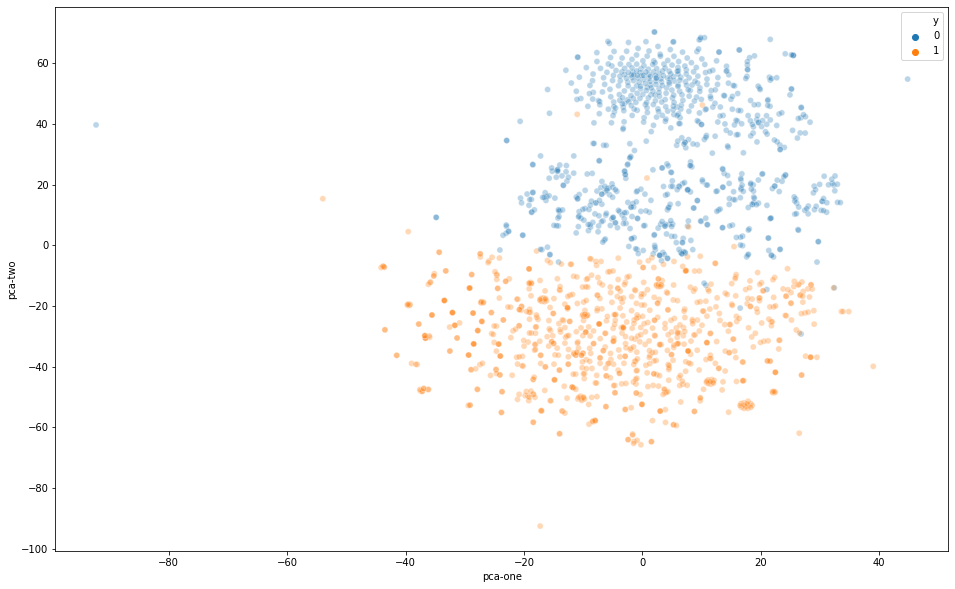

In [56]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="pca-one", y="pca-two",
    hue="y",
    data=df,
    legend="full",
    alpha=0.3
)

In [153]:
idf_vectorizer.vocabulary_['сдавать']

16417

In [156]:
idf_vectorizer.get_feature_names()[17057]

'снимать'